# Single stock analysis example in pyfolio

Here's a simple example where we produce a set of plots, called a tear sheet, for a single stock.

## Import pyfolio and matplotlib

In [2]:
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

## Fetch the daily returns for a stock

In [3]:
stock_rets = pf.utils.get_symbol_rets('FB')

## Create a returns tear sheet for the single stock
This will show charts and analysis about returns of the single stock.

Entire data start date: 2012-05-21
Entire data end date: 2017-08-22
In-sample months: 42
Out-of-sample months: 20


,All,In-sample,Out-of-sample
Annual return,32.8%,32.9%,32.6%
Cumulative returns,343.7%,172.7%,62.7%
Annual volatility,38.0%,43.2%,24.3%
Sharpe ratio,0.93,0.87,1.28
Calmar ratio,0.61,0.61,2.38
Stability,0.92,0.89,0.88
Max drawdown,-53.6%,-53.6%,-13.7%
Omega ratio,1.20,1.18,1.29
Sortino ratio,1.50,1.39,2.09
Skew,1.89,1.73,2.12


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,47.90,2012-05-21,2012-09-04,2013-07-25,309
1,22.06,2014-03-10,2014-04-28,2014-07-24,99
2,17.34,2013-10-18,2013-11-25,2013-12-17,43
3,16.57,2015-07-21,2015-08-24,2015-10-19,65
4,13.68,2016-10-24,2016-12-30,2017-02-08,78


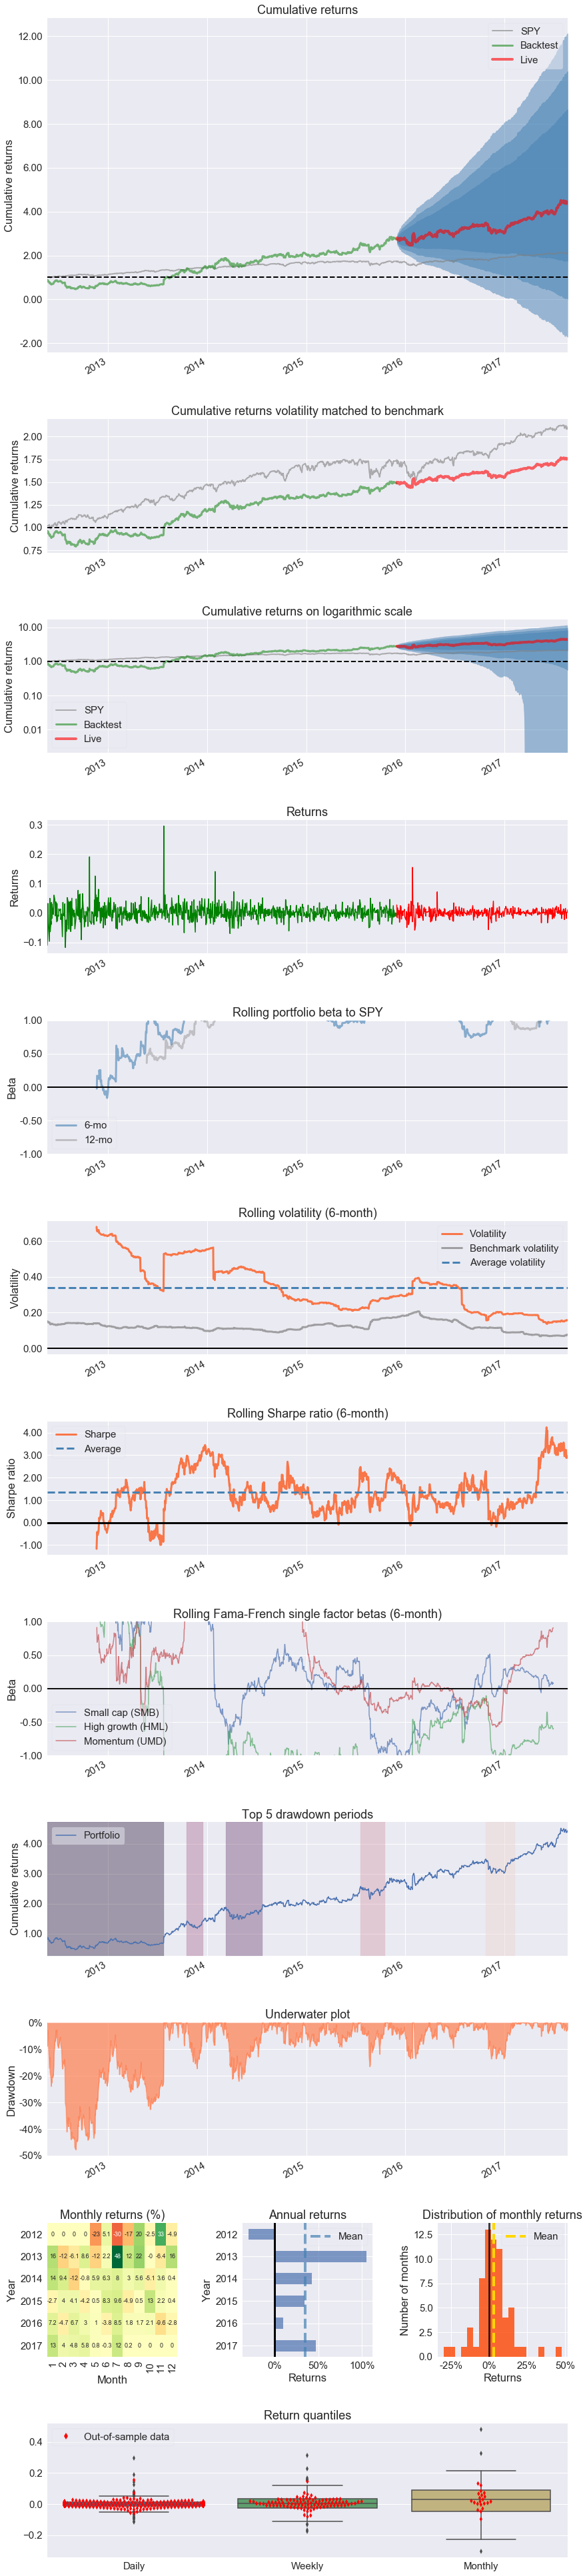

In [4]:
pf.create_returns_tear_sheet(stock_rets, live_start_date='2015-12-1')